<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/ESAA_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C_0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주요용어

1. 하이퍼파라미터

-> 딥러닝&머신러닝 시 사용자가 직접 설정해주는 설정 값

-> 자동으로 업데이트&조정되는 가중치나 편향과 다르게 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야 하는 값들이 매우 많다

-> 모델의 예측성능을 높이기 위해 하이퍼파리미터 값들을 조절하는 행위=하이퍼파리미터 튜닝

2. 과소적합  vs 과대적합

-> 머신러닝에서 주어진 훈련 데이터에서 패턴 학습을 통해 모델을 완성해 나간다

-> 훈련용 데이터를 반복적으로 헉습하면서 사람이 발견하지 못하는 패턴을 패턴을 발견하므로써 사람의 예측 성능을 뛰어넘는 모델을 생성할 수 있다.

->과소적합: 모델이 충분히 학습되지 않은 경우에 예측 성능이 떨어지는 것

->과대적합: 학습 데이터를 지나치게 반복 학습하여 과하게 적합된 상태, 훈련 데이터에 대한 예측 성능은 좋지만 정작 중요한 예측 데이터에 대한 예측 오차가 발생할 확률이 커짐

3. 에포크

-> 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정

-> 반복훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1epoch라고 함

-> 하이퍼파라미터이다

4. 소실함수

-> 예측 값과 정답 값의 차이 또는 오차

-> 사용자가 직접 정의해야 함

In [6]:
#텐서플로는 사전 정의된 손실함수를 함수형과 클래스형으로 제공
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()
#함수형
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

5. 경사하강법
-> 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소함수를 갖도록 하는 방법
-> 최적화 함수의 근간이 되는 알고리즘

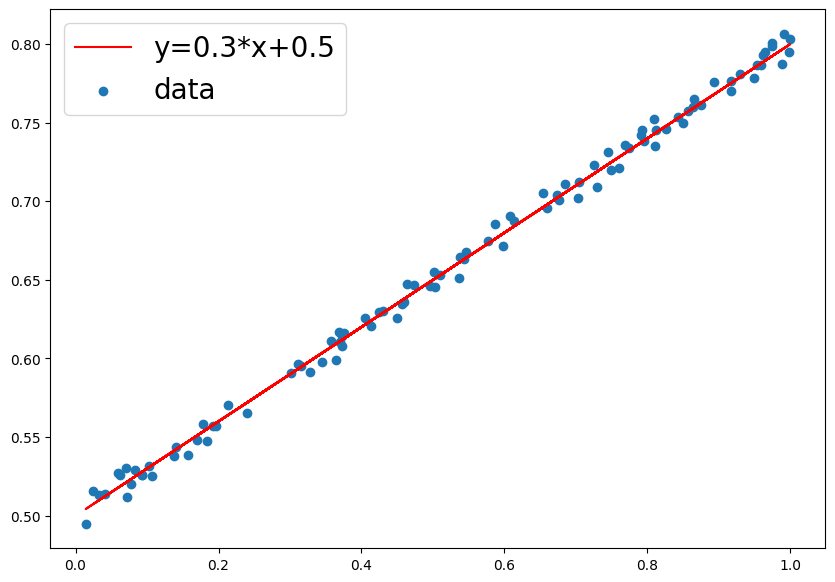

w:0.3, b:0.5


In [7]:
#경사하강법
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8,size=50,noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x,y=make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [12]:
#넘파이로 최적화하는 과정

#최대 반복 학습
num_epoch=1000

#학습률
learning_rate=0.005

#에러 기록
errors=[]

#random한 값으로 w,b를 초기화
w=np.random.uniform(low=0.0,high=1.0)
b=np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  #가설정의
  y_hat=w*x+b

  #손실함수 정의
  error=0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  #그레디언트 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2}w={1:.5f},b={2:.5f}error={3:.5f}".format(epoch,w,b,error))

print("----"*15)
print("{0:2}w={1:.5f},b={2:.5f}error={3:.5f}".format(epoch,w,b,error))

 0w=0.68822,b=0.48395error=17.64899
 5w=0.55111,b=0.35777error=0.31297
10w=0.50983,b=0.38036error=0.21881
15w=0.47569,b=0.39990error=0.15333
20w=0.44716,b=0.41623error=0.10758
25w=0.42331,b=0.42989error=0.07562
30w=0.40337,b=0.44130error=0.05328
35w=0.38671,b=0.45084error=0.03768
40w=0.37278,b=0.45881error=0.02678
45w=0.36114,b=0.46548error=0.01916
50w=0.35140,b=0.47105error=0.01383
55w=0.34327,b=0.47571error=0.01011
60w=0.33647,b=0.47960error=0.00752
65w=0.33078,b=0.48286error=0.00570
------------------------------------------------------------
68w=0.32878,b=0.48400error=0.00489


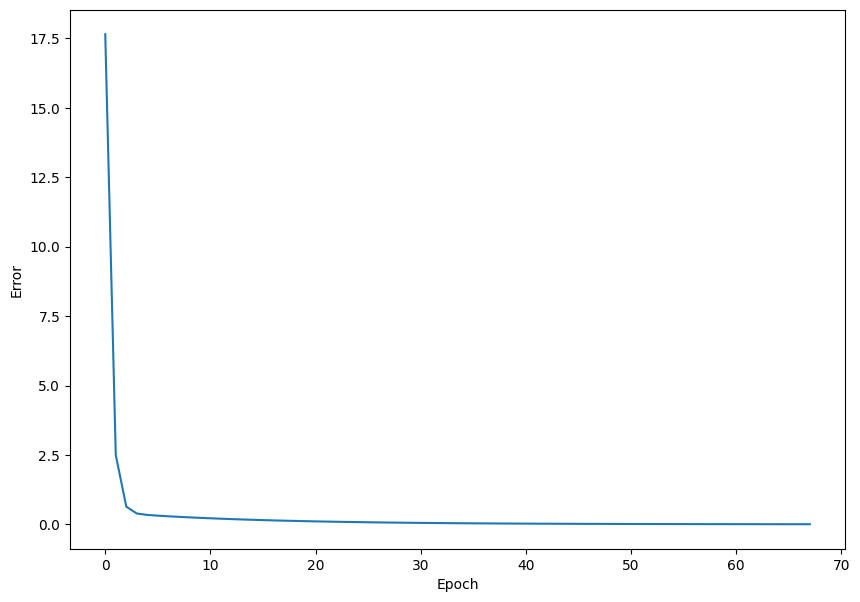

In [13]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# 딥러닝 프로세스

데이터 전처리, 모델의 생성, 컴파일, 훈련은 모델의 훈련을 위한 필수 프로세스로 누락되는 단계X

예측은 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정

검증은 모델의 성능을 평가하는 단계

1. 데이터 전처리

-> 데이터를 가공하는 단계

2. 모델 생성

-> 모델의 구조를 정의하고 생성하는 단계
->순차적인 구조의 모델: Sequential API
->다중 입력 및 출력을 가지고 복잡한 구조를 갖는 모델: Functional API 혹은 Model Subclassing 방법으로 구현

3. 모델 컴파일
-> 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
->모델 인스턴스에 compile()메소드 적용

4. 모델 훈련
->fit()함수에 모델 훈련에 필요한 정보를 매개변수로 전달

5. 모델 검증
-> 훈련이 완료된 모델을 검증하는 단계
-> 검증 결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고 컴파일 및 훈련 과정을 거쳐 재평가하는 단계를 통해 목표 성능에 도달할 떄까지 과정을 계속 반복

6. 모델 예측
-> 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환함

# 단순 신경망 훈련

1. 선형회귀

-> 회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

2. 뉴런

-> 인공신경망모델을 구성하는 하나의 신경

-> =노드

-> 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트 됨

3. Dense 레이어

-> 심층 신경망 모델을 구성하는 가장 기본 레이어

-> 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에 '완전연결층'이라고 부름


In [14]:
import tensorflow as tf

#10개의 노드로 이루어진 덴스 레이어
tf.keras.layers.Dense(10)

#ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

4. 데이터셋 만들기



In [15]:
#샘플 데이터셋 생성
x=np.arange(1,6)

#y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


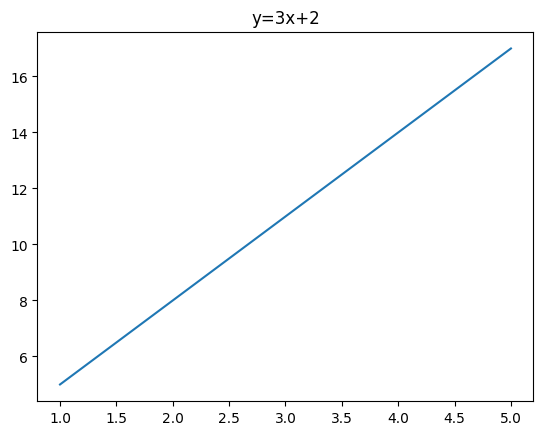

In [16]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

5. Sequential API

-> 층을 이어 붙이듯 시퀸스에 맞게 일렬로 연결하는 방식

-> 입력 레이어 부터 출력 레이어까지 순서를 갖는다

-> 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다는 단점

## 모델구조

In [17]:
import tensorflow as tf

#리스트형
model=tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(5),
      tf.keras.layers.Dense(1)
])

In [18]:
#add함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

## 입력 데이터 형태

In [20]:
import tensorflow as tf
model=tf.keras.Sequential([
    #입력데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
                           ])

## 단순선형회귀 모델 정의

In [21]:
#단순선형회귀 모델 생성
model=tf.keras.Sequential([
       tf.keras.layers.Dense(1, input_shape=[1])
])

6. 모델 요약

-> model.summary()

7. 컴파일

-> 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수 그리고 평가지표 정의

-> 클래스 인스턴스, 함수 혹은 사전 정의된 문자열로 지정 가능

In [22]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error','mean_absolute_error'])

In [23]:
# 짧은 문자열 지정
model.compile(optimizer='sgd',loss='mse', metrics=['mse','mae'])

In [24]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError(

                       )])

In [25]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

8. 훈련
-> 가중치 텐서를 업데이트 하는 과정

In [26]:
#단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 453ms/step - loss: 50.5552 - mae: 6.7486
Epoch 2/1200
1/1 [==============================] - 0s 12ms/step - loss: 29.6182 - mae: 5.2090
Epoch 3/1200
1/1 [==============================] - 0s 13ms/step - loss: 17.4161 - mae: 4.0334
Epoch 4/1200
1/1 [==============================] - 0s 12ms/step - loss: 10.3043 - mae: 3.1358
Epoch 5/1200
1/1 [==============================] - 0s 12ms/step - loss: 6.1588 - mae: 2.4504
Epoch 6/1200
1/1 [==============================] - 0s 14ms/step - loss: 3.7420 - mae: 1.9270
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.3326 - mae: 1.5273
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.5102 - mae: 1.2219
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.0300 - mae: 0.9886
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 0.7491 - mae: 0.8104
Epoch 11/1200
1/1 [==============================] - 0

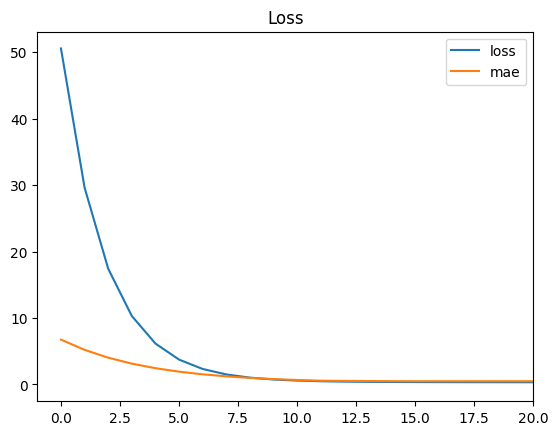

In [27]:
import matplotlib.pyplot as plt

#20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

9. 검증

In [28]:
#검증
model.evaluate(x,y)

1/1 [==============================] - 0s 148ms/step - loss: 1.1299e-04 - mae: 0.0091


[0.00011298683239147067, 0.009123516269028187]

10. 예측

In [29]:
#예측
model.predict([10])

1/1 [==============================] - 0s 90ms/step


array([[32.044098]], dtype=float32)

# 심층 신경망으로 이미지 분류

이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성

1. 케라스 내장 데이터셋 로드


In [30]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

In [31]:
#load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [32]:
#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


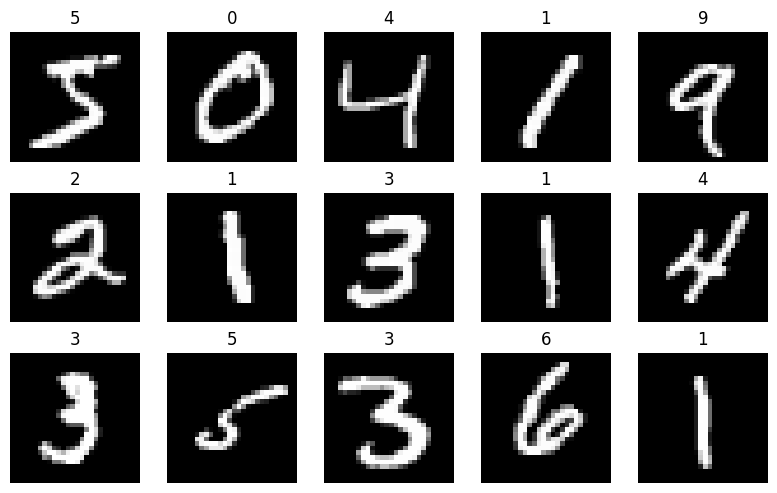

In [38]:
#데이터 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5)
# Set the figure size in inches
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

2. 데이터 전처리

In [39]:
#x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [40]:
#픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#정규화
x_train=x_train/x_train.max()

#정규화 후 최소최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [41]:
#test 셋에도 정규화 동일 적용
x_test=x_test/x_test.max()

In [42]:
#변환 후 x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3. Flatten 레이어

In [44]:
print(f'변경 전 shape: {x_train.shape}')
print(f'ID로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
ID로 shape 변경 후: (60000, 784)


In [45]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후:(60000, 784)


4. 활성화 함수

-> 입력을 비선형 출력으로 변환해주는 함수

-> 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU 등등

In [46]:
#Dense 레이어에 relu 활성화 함수 적용할 경우
tf.keras.layers.Dense(128, activation='relu')

In [47]:
#Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

5. 입력과 출력

In [49]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
#출력층 노드=1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

6. 손실함수

In [51]:
#이진 분류 (출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [52]:
#y가 원핫 벡터인 경우
#[0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터가 아닌 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')

7. 옵티마이저

-> 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

In [54]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

8. 평가지표

In [55]:
#클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [56]:
#문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

9. 훈련


In [58]:
#훈련
model.fit(x_train, y_train,
          #검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2200 - accuracy: 0.9343 - val_loss: 0.1438 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0936 - accuracy: 0.9715 - val_loss: 0.1093 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0802 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0870 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0802 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0721 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.0808 - val_

10. 평가

In [59]:
#검증
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도:',test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0890 - accuracy: 0.9789
검증 셋 정확도: 0.9789000153541565


11. 예측

In [60]:
#예측
prediction=model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [61]:
#예측 결과 출력
prediction[0]

array([2.5160517e-08, 5.9536344e-08, 4.7139906e-06, 5.0599959e-07,
       6.2623908e-06, 3.0476907e-10, 3.3929533e-11, 9.9995786e-01,
       1.1680865e-07, 3.0386407e-05], dtype=float32)

In [62]:
import numpy as np

#0번 index 에 대한 예측 클래스 출력
print(np.argmax(prediction[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(prediction[:10],axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


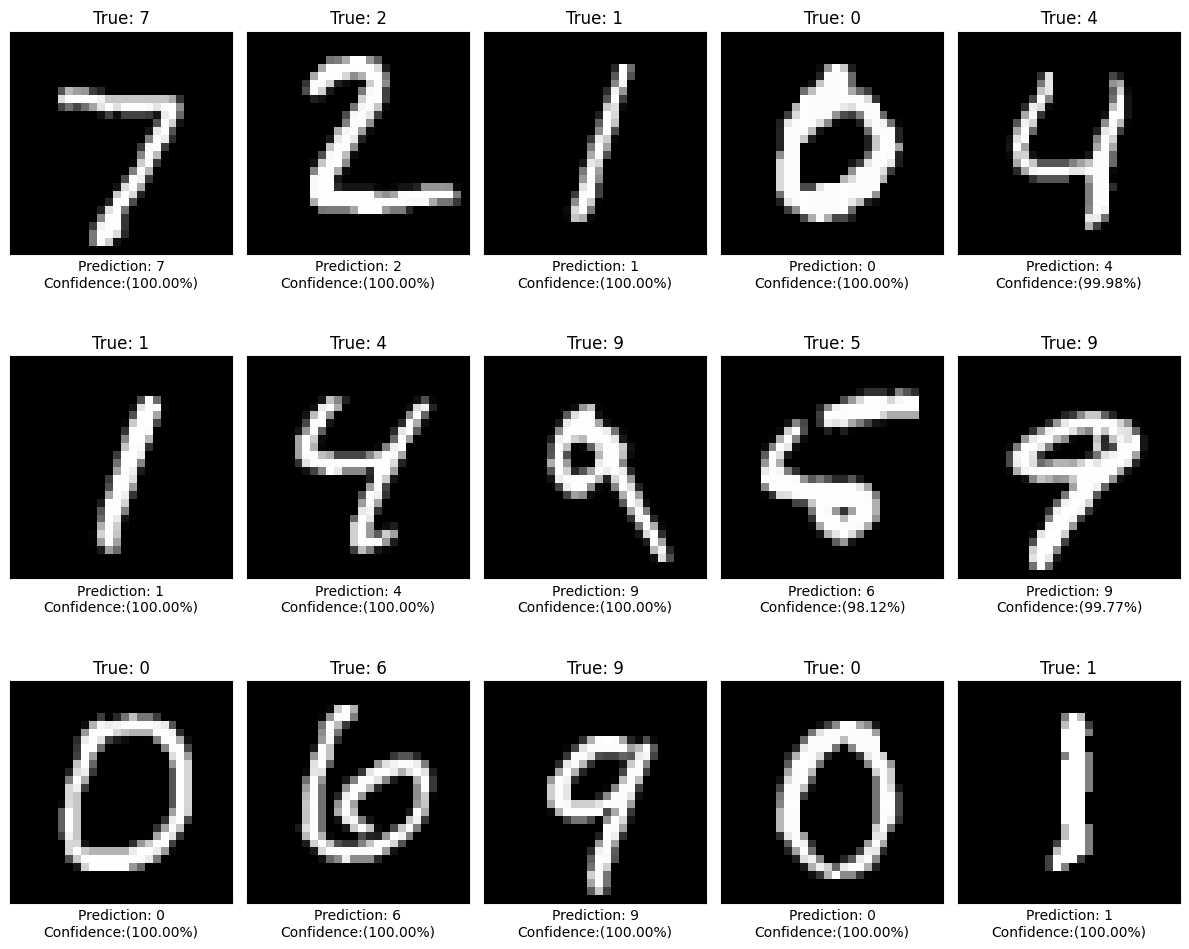

In [67]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(prediction[idx]), 100*np.max(prediction[idx])
  return img, y_true, y_pred, confidence
#canvas 생성
fig, axes=plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence:({confidence:.2f}%)')
plt.tight_layout()
plt.show()